In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVR,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,PowerTransformer,LabelEncoder
from scipy.stats import skew, zscore
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score, precision_score, recall_score, f1_score,accuracy_score,confusion_matrix

In [107]:
dataset = pd.read_csv("Boston.csv")
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [47]:
dataset.shape

(506, 13)

In [45]:
dataset.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [49]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [65]:
data_f = pd.DataFrame(dataset)
data_f.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

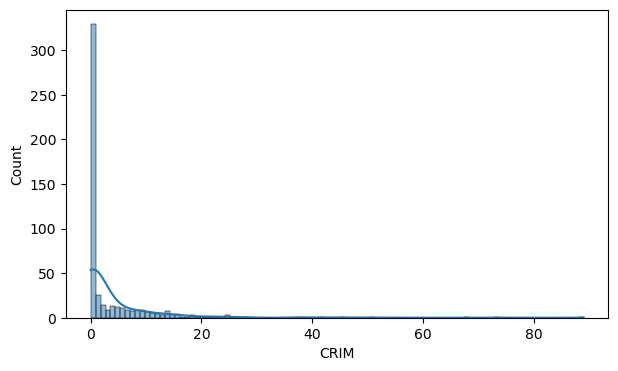

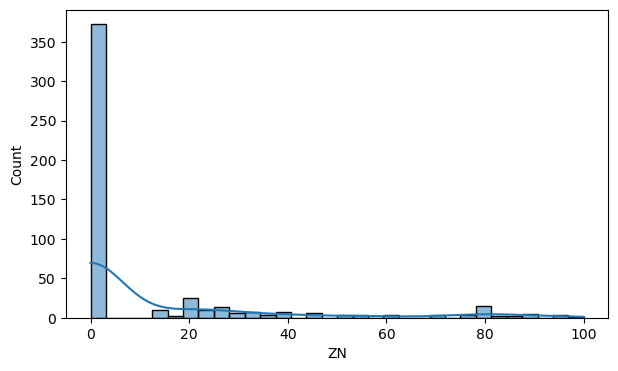

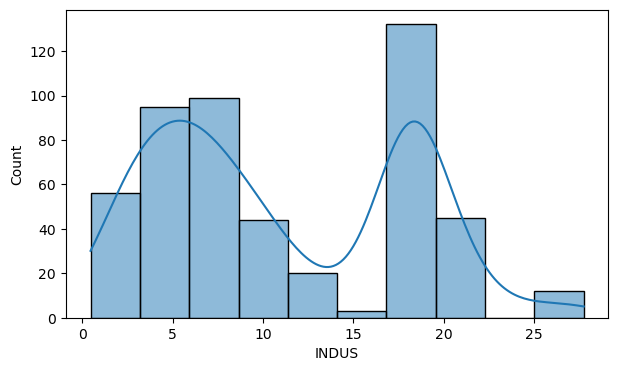

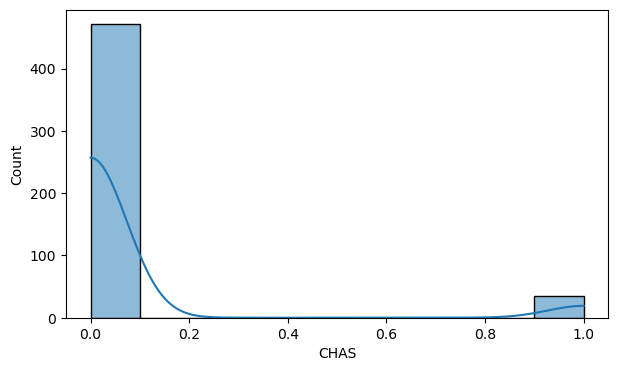

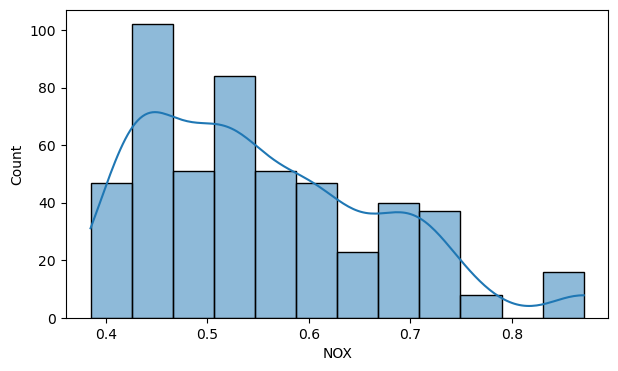

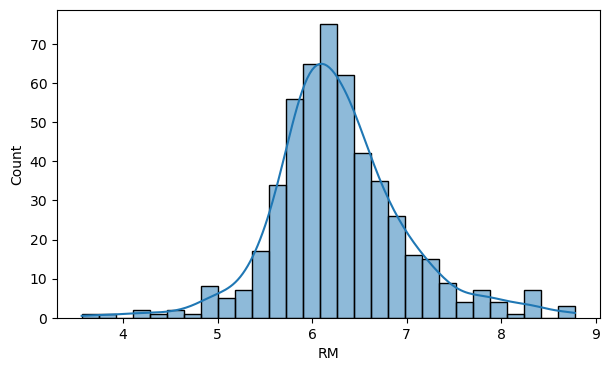

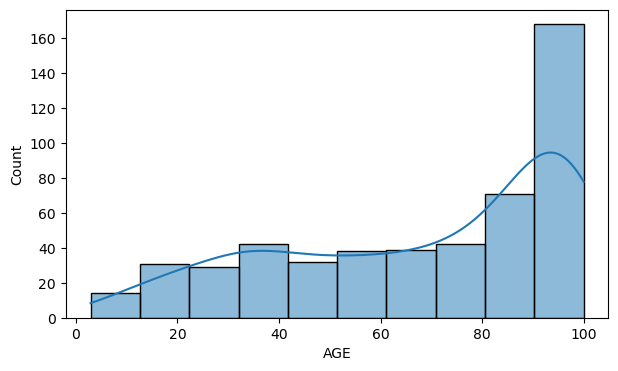

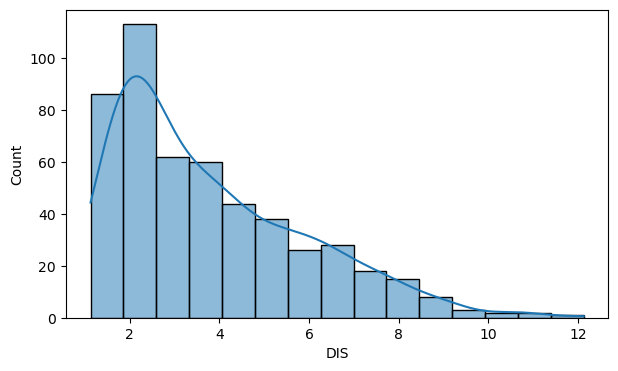

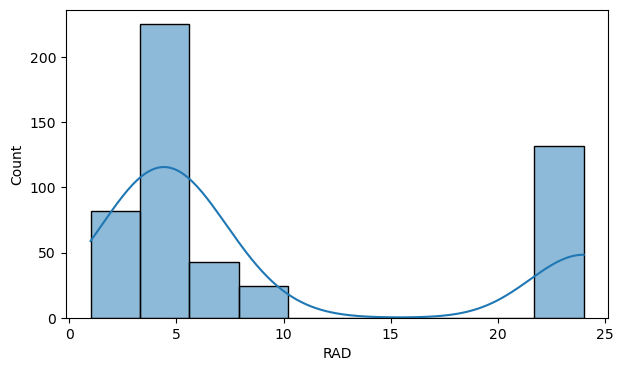

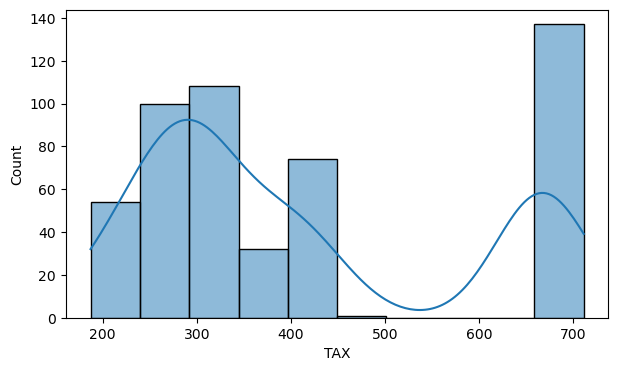

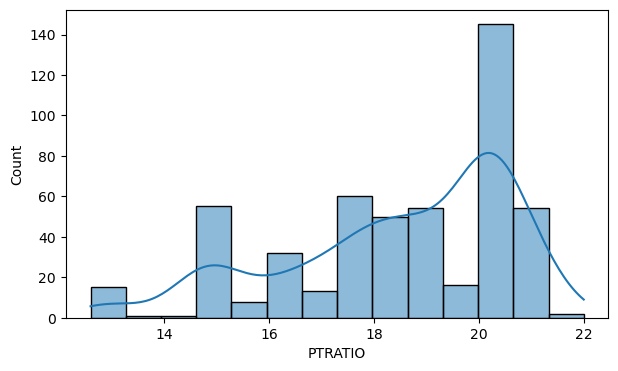

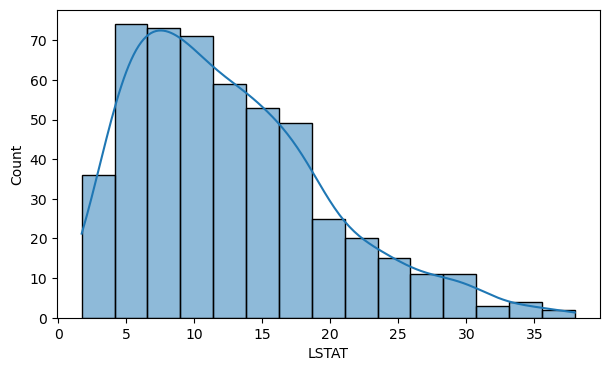

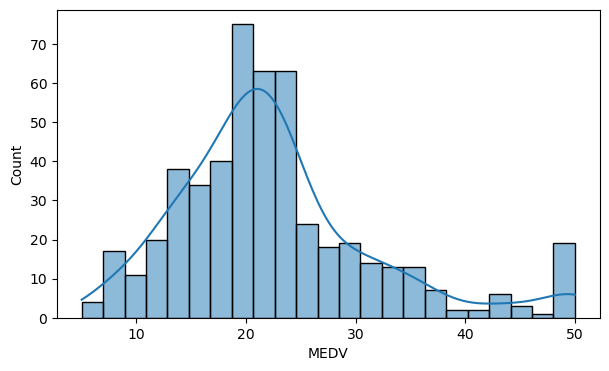

In [51]:
for i in data_f.columns:
     plt.figure(figsize = (7, 4))
     sns.histplot(data = data_f, x = i, kde = True)
    
plt.show()
     

In [32]:
data_f.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [62]:
from scipy.stats import skew
col = ['CRIM','ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV']
sk = data_f[col].skew()
sk

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
LSTAT      0.906460
MEDV       1.108098
dtype: float64

In [66]:
log_transform_features = ['CRIM', 'ZN','CHAS', 'DIS','RAD', 'NOX']
for feature in log_transform_features:
    data_f[feature] = np.log1p(data_f[feature])

In [67]:
sk = data_f[col].skew()
sk

CRIM       1.269201
ZN         1.193451
INDUS      0.295022
CHAS       3.405904
NOX        0.584347
RM         0.403612
AGE       -0.598963
DIS        0.331561
RAD        0.532760
TAX        0.669956
PTRATIO   -0.802325
LSTAT      0.906460
MEDV       1.108098
dtype: float64

In [70]:
X = data_f.drop('MEDV', axis=1)
y =data_f['MEDV']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}


In [74]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [75]:
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2')
grid_rf.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [76]:
print("Best Parameters for Random Forest:", grid_rf.best_params_)

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [77]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, mae, r2


In [78]:
results = {}
for name, model in models.items():
    mse, rmse, mae, r2 = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results[name] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2 Score': r2}


In [79]:
mse, rmse, mae, r2 = evaluate_model(grid_rf.best_estimator_, X_train_scaled, X_test_scaled, y_train, y_test)
results['Random Forest (Tuned)'] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2 Score': r2}

In [80]:
results_df = pd.DataFrame(results).T.sort_values(by='R2 Score', ascending=False)
print(results_df)

                                MSE      RMSE       MAE  R2 Score
Gradient Boosting          6.229970  2.495991  1.904525  0.915046
Random Forest              8.023021  2.832494  2.036402  0.890596
Random Forest (Tuned)      8.023021  2.832494  2.036402  0.890596
Decision Tree              8.979804  2.996632  2.217647  0.877549
Support Vector Regressor  21.743299  4.662971  2.475304  0.703502
Linear Regression         22.850364  4.780205  3.188353  0.688406


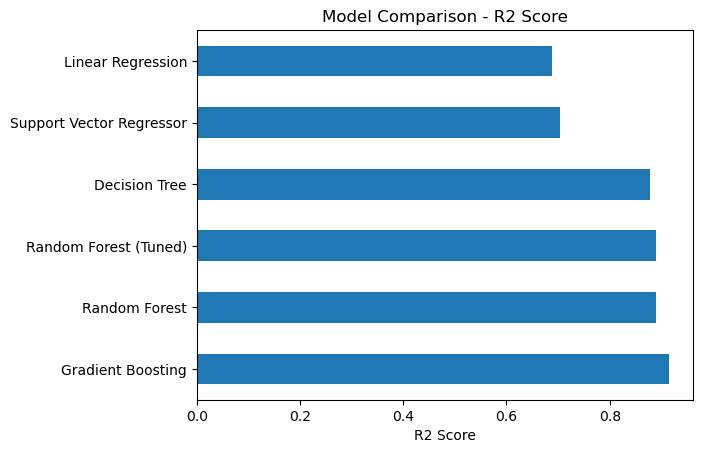

In [81]:
results_df['R2 Score'].plot(kind='barh')
plt.title('Model Comparison - R2 Score')
plt.xlabel('R2 Score')
plt.show()


In [86]:
titanic_data = pd.read_csv("titanic.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [88]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [89]:
titanic_data.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [90]:
age_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']
age_data = titanic_data[age_features]
age_data = pd.get_dummies(age_data)

In [91]:
known_age = titanic_data[titanic_data['Age'].notnull()]
unknown_age = titanic_data[titanic_data['Age'].isnull()]

In [92]:
X_age = age_data.loc[known_age.index]
y_age = known_age['Age']

In [93]:
age_regressor = DecisionTreeRegressor()
age_regressor.fit(X_age, y_age)

DecisionTreeRegressor()

In [94]:
predicted_ages = age_regressor.predict(age_data.loc[unknown_age.index])
titanic_data.loc[unknown_age.index, 'Age'] = predicted_ages

In [95]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [96]:
titanic_data['Deck'] = titanic_data['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'U')
titanic_data.drop('Cabin', axis=1, inplace=True)

In [99]:
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])
titanic_data['Deck'] = label_encoder.fit_transform(titanic_data['Deck'])


In [100]:
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [102]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [112]:
models = {'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)}

In [117]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    

    return accuracy, precision, recall, f1


In [118]:
results = {}

for name, model in models.items():
    accuracy, precision, recall, f1= evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}


In [119]:
results_df = pd.DataFrame(results).T.sort_values(by='Accuracy', ascending=False)
print(results_df)

                        Accuracy  Precision    Recall  F1 Score
Logistic Regression     0.821229   0.800000  0.756757  0.777778
Gradient Boosting       0.821229   0.800000  0.756757  0.777778
Random Forest           0.810056   0.777778  0.756757  0.767123
K-Nearest Neighbors     0.810056   0.777778  0.756757  0.767123
Support Vector Machine  0.810056   0.794118  0.729730  0.760563
Decision Tree           0.754190   0.692308  0.729730  0.710526


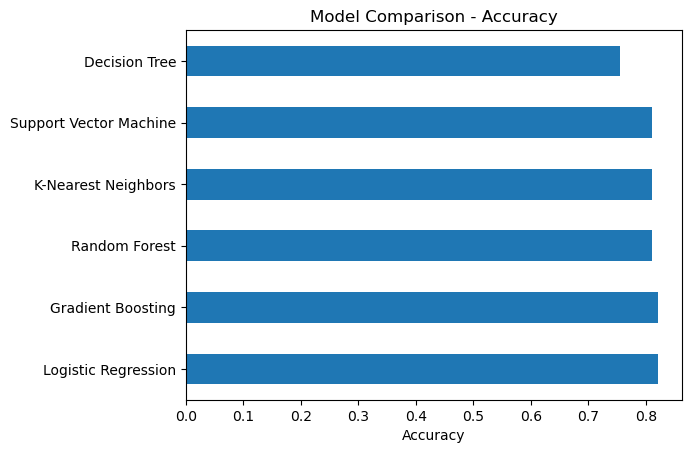

In [120]:
results_df['Accuracy'].plot(kind='barh')
plt.title('Model Comparison - Accuracy')
plt.xlabel('Accuracy')
plt.show()
